In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets


In [117]:
from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Documents/finaldatasetforproject.csv')

X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values

In [118]:

svc = SVC(kernel='linear')
svc.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(0,120)
tmp1 = np.linspace(0,30)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':3.5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':3.5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers',},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Network Delay (ms)','range': [0,25],'dtick': 5}})

fig.update_xaxes(
        title_font = {"size": 15}
        )
fig.show()


In [110]:
dataset = pd.read_csv('/home/inlab/Documents/finaldatasetforproject.csv')
result = ['Trustable','Non-Trustable']
dataset.head()
dataset.shape

(919, 5)

In [111]:
X = dataset.iloc[:,[0,1,2]].values


In [112]:
y = dataset['Trustable']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Trustable, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('The size of the training "X" (input features) is', X_train.shape)
print('\n')
print('The size of our testing "X" (input features) is', X_test.shape)
print('\n')
print('The size of the training "y" (output features) is', y_train.shape)
print('\n')
print('The size of the training "y" (output features) is', y_test.shape)

The size of the training "X" (input features) is (735, 3)


The size of our testing "X" (input features) is (184, 3)


The size of the training "y" (output features) is (735,)


The size of the training "y" (output features) is (184,)


In [114]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

<AxesSubplot:>

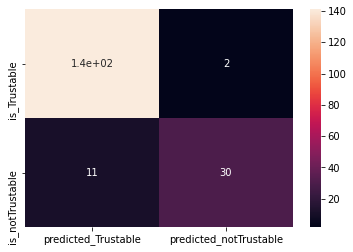

In [115]:
y_predict1 = svc_model.predict(X_train)
y_predict = svc_model.predict(X_test)
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_Trustable', 'is_notTrustable'],
                    columns=['predicted_Trustable','predicted_notTrustable'])
confusion
sns.heatmap(confusion,annot=True)

In [116]:
#print(classification_report(y_train, y_predict1))

#print("test set prediction accuracy: {:.2f}".format(svc_model.score(X_test, y_predict)))
print(classification_report(y_test, y_predict))
print("training set accuracy: {:.2f}".format(svc_model.score(X_train, y_train)))
print("test set accuracy: {:.2f}".format(svc_model.score(X_test, y_test)))


              precision    recall  f1-score   support

           0       0.94      0.73      0.82        41
           1       0.93      0.99      0.96       143

    accuracy                           0.93       184
   macro avg       0.93      0.86      0.89       184
weighted avg       0.93      0.93      0.93       184

training set accuracy: 0.95
test set accuracy: 0.93


In [23]:
model = SVC(kernel='rbf', probability=True, C=100000)
clf = model.fit(X_train, y_train)

    # Predict class labels on training data
pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model

score_te = model.score(X_test, y_test)

    # Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))



score_tr = model.score(X_train, y_train)
print("Training set Accuracy: {:.2f}".format(score_tr))
print('Test set Accuracy: {:.2f}'.format(score_te))
    # Look at classification report to evaluate the model


    


              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.99      0.96      0.97       158

    accuracy                           0.96       200
   macro avg       0.93      0.96      0.94       200
weighted avg       0.96      0.96      0.96       200

Training set Accuracy: 0.99
Test set Accuracy: 0.96


In [43]:
print("SVM-based peer set selection mechanism")
TotalPeer = int(input("Total Peers: "))
EndorsingPeer = int(input( "Ratio of Endorsing peers to all peers(%): "))
BandwidthLimit = int(input( "Bandwidth Limit(Mbps): "))
new_input = [[TotalPeer,EndorsingPeer,BandwidthLimit]]  
predictions = svc_model.predict(new_input)
print(predictions)
if predictions == 1:
    print('Prediction: The input Endorsing peer set is Trustable peer set')
else:
    print('Prediction: The input Endorsing peer set is Non-Trustable peer set')
    print('Reselect the peer set')



SVM-based peer set selection mechanism
Total Peers: 25
Ratio of Endorsing peers to all peers(%): 70
Bandwidth Limit(Mbps): 25
[1]
Prediction: The input Endorsing peer set is Trustable peer set


In [57]:
print("SVM-based peer set selection mechanism")
TotalPeer = int(input("Total Peers: "))
EndorsingPeer = int(input( "Ratio of Endorsing peers to all peers(%): "))
BandwidthLimit = int(input( "Bandwidth Limit(Mbps): "))
new_input = [[TotalPeer,EndorsingPeer,BandwidthLimit]]
original_input = [[TotalPeer,dataset.EndorsingPeer,dataset.BandwidthLimit]]
predictions = svc_model.predict(new_input)
print(predictions)
if predictions == 1:
    print('Prediction: The input Endorsing peer set is Trustable peer set')
    print(new_input)
    
else:
    print(new_input)
    print('Prediction: The input Endorsing peer set is Non-Trustable peer set')
    print('Reselect the peer set')
    

    


SVM-based peer set selection mechanism
Total Peers: 27
Ratio of Endorsing peers to all peers(%): 100
Bandwidth Limit(Mbps): 13
[0]
[[27, 100, 13]]
Prediction: The input Endorsing peer set is Non-Trustable peer set
Reselect the peer set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')
result = ['Trustable','Non-Trustable']

X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

from sklearn.svm import SVC
#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(10,100,51)
tmp1 = np.linspace(0,30)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X_train[y_train==0,0], y=X_train[y_train==0,1], z=X_train[y_train==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X_train[y_train==1,0], y=X_train[y_train==1,1], z=X_train[y_train==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':5}, name = "Trustable")

fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers', 'range': [0,30]},
'yaxis':{'title': 'Endorsing Peers(%)','range': [10,130]},
'zaxis':{'title': 'Bandwidth Limit(Mbps)'}})


fig.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')
result = ['Trustable','Non-Trustable']

X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

from sklearn.svm import SVC
#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(10,130,51)
tmp1 = np.linspace(0,30,100)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X_test[y_test==0,0], y=X_test[y_test==0,1], z=X_test[y_test==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X_test[y_test==1,0], y=X_test[y_test==1,1], z=X_test[y_test==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers'},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Bandwidth Limit(Mbps)'}})
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')


X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

from sklearn.svm import SVC
#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(10,130,51)
tmp1 = np.linspace(0,30,100)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)
svs = svc.support_vectors_
#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y,colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter(x=X_test[y_test==0,0], y=X_test[y_test==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter(x=X_test[y_test==1,0], y=X_test[y_test==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':5}, name = "Trustable")
fig.add_scatter(svs[:, 0], svs[:, 1], s=180,
            facecolors='#FFAAAA')
#plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
#fig.add_scatter(x=X_test[y_test==0,0], y=X_test[y_test==0,1], z=X_test[y_test==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':5,'opacity':0.5}, name = "Non-trustable")
#fig.add_scatter(x=X_test[y_test==1,0], y=X_test[y_test==1,1], z=X_test[y_test==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers'},
'yaxis':{'title': 'Endorsing Peers(%)'},
       })
fig.show()
print (svc.support_vectors_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from skimage import measure
from sklearn.feature_selection import RFE
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')
result = ['Trustable','Non-Trustable']

X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values
#fig = plt.figure()
fig = go.FigureWidget()
# fit the model
clf = svm.SVC(kernel='rbf',C=100000)
clf.fit(X, Y)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]

#ax.scatter3D(dataset.iloc[:,0],dataset.iloc[:,1],dataset.iloc[:,2], c = Y, cmap=plt.cm.Paired)
#fig.add_scatter3d(dataset.iloc[:,0],dataset.iloc[:,1],dataset.iloc[:,2], c = Y)
fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers', 'range': [0,30]},
'yaxis':{'title': 'Endorsing Peers(%)','range': [10,140]},
'zaxis':{'title': 'Bandwidth Limit(Mbps)'}})
fig.show()

In [ ]:
# PCA for 2 Dimensions Hyperledger Fabric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')

X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values

pca = PCA(n_components=2)
scaler = StandardScaler()

X = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='copper')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')





In [ ]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=10)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)



In [ ]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=10)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [ ]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=100)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [ ]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=1000)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [ ]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=10000)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [ ]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=100000)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [ ]:
clf = SVC(kernel='linear').fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf);
clf.support_vectors_

In [ ]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
X = pca.fit_transform(X)  
clf = SVC(kernel='linear').fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class LDA():
    def Train(self, X, y):
        # X is the training data set, y is the training label
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
        X2 = np.array([X[i] for i in range(len(X)) if y[i] == 1])
        # Find the center point
        mju1 = np.mean(X1, axis=0)  # mju1 is ndrray type
        mju2 = np.mean(X2, axis=0)
        # dot(a, b, out=None) Calculate matrix multiplication
        cov1 = np.dot((X1 - mju1).T, (X1 - mju1))
        cov2 = np.dot((X2 - mju2).T, (X2 - mju2))
        Sw = cov1 + cov2
        # Calculate w
        w = np.dot(np.mat(Sw).I, (mju1 - mju2).reshape((len(mju1), 1)))
        # Record training results
        self.mju1 = mju1  # Category 1 classification center
        self.cov1 = cov1
        self.mju2 = mju2  # Category 2 classification center
        self.cov2 = cov2
        self.Sw = Sw  # Intra-class divergence matrix
        self.w = w  # Discrimination weight matrix
    def Test(self, X, y):
        """X is the test data set, y is the test label"""
        # Classification results
        y_new = np.dot((X), self.w)
        # Calculate fisher linear discriminant
        nums = len(y)
        c1 = np.dot((self.mju1 - self.mju2).reshape(1, (len(self.mju1))), np.mat(self.Sw).I)
        c2 = np.dot(c1, (self.mju1 + self.mju2).reshape((len(self.mju1), 1)))
        c = 1/2 * c2  # 2 categories in the center
        h = y_new - c
        # Discrimination
        y_hat = []
        for i in range(nums):
            if h[i] >= 0:
                y_hat.append(0)
            else:
                y_hat.append(1)
        # Calculate classification accuracy
        count = 0
        for i in range(nums):
            if y_hat[i] == y[i]:
                count += 1
        precise = count / nums
        # Display information
        print("The number of test samples:", nums)
        print("Predict the number of correct samples:", count)
        print("Test accuracy:", precise)
        return precise
    
if '__main__' == __name__:
    # Generate classified data
    dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledger.csv')

    X = dataset.iloc[:,[0,1,2]].values

    y = dataset.iloc[:, 4].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
    # LDA linear discriminant analysis (two classification)
    lda = LDA()
    # 60% for training, 40% for testing

    lda.Train(X_train, y_train)
    precise = lda.Test(X_test, y_test)
    # Raw data
    plt.scatter(X[:, 0], X[:, 2], marker='o', c=y)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Test precise:" + str(precise))
    plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Get the w and b of the decision boundary
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    # Draw the thick line in the middle
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # Calculation interval
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    # Get support vector
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.title("Large interval classification", fontsize=16)
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

